# New tasks:
- make a function that read a fasta file from disk and yields (header, seq) pairs +
- ex from:
>AB003409.1/96-167
GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comment
CCAGUGGGUCCA
>AB009835.1/1-71
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
- yield:
(AB003409.1/96-167, GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA)
(AB009835.1/1-71,CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUUCAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUUCAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUUCAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU)

- make a function that receives in input the list of sequences, and yields structure graphs +
- make a function that receives a iterator over graphs and i,j and plots only graphs from num i to num j


1. test if space or tab
2. test if command (after a space or any latter exept 'aucg' or 'rnytkmswbdhvgu')
3. test if new line without header then concatenate
4. test if new line with header then new graph

In [128]:
%matplotlib inline
import os, sys
import subprocess as sp
from itertools import cycle
import networkx as nx
import re
from eden.util import display

class FastaToGraph(object):
    def __init__(self):
        pass
    
    def SequeceWrapper(self, path):
        #path = "/home/alsheikm/Work/EDeN_examples/fastaFiles/"
        seq = self._readFastaFile(path)
        seqs = self._removeCommends(seq)
        #print ("path", path)
        return seq
    
# read a fasta file separate the head and the sequence
# read a fine not a directory

    def _readFastaFile(self, path):
#       path = "/home/alsheikm/Work/EDeN_examples/fastaFiles/"
        head_start = '>'
        heads = []
        seqs = []
        seq_temps = []
        string_seq = ''
        print "again here"
        

        for file in os.listdir(path):
            #open file
            read_file = open(os.path.join( path, file),'r')
            print file
            
            # seperate the head and the sequence
            for line in read_file:
                lines = list(line)
                # the read line is the head of the sequence write it in head list
                if lines[0] == head_start:
                    line = line.split(head_start)
                    heads.append(line)
                    seqs.append(string_seq)
                    #print ("seq1", seq)
                    seq_temps = []
                    #print ("head", head)

                # the read line is a sequence writ it in a sequence list
                if lines[0] != head_start:
                    seq_temps.append(line)
                    #print ("seq_temps", seq_temps)
                    string_seq= ''.join(seq_temps)
                    #print ("string_seq", string_seq)

            seqs.append(string_seq)      
            print ('heads', heads)
            print ("seq", seqs)            
            yield seqs
    
    #read a line ignore string after the whitspace, tab and not (a,c,g,u)
    def _removeCommends(self, seq):
        seq_list = []
        not_added_string = []
        input_seqs = seq
        print ("input_seqs", input_seqs)
        seqs = []
        
        #print ("string seq2:", seq)
        #for letter in input_seqs:
        #for i, letter in enumerate(seq):
        print 'again'
            #seq = str(seq)                  
        if seq == "A" or seq == "C" or seq == "G" or seq == "U":
            #    if letter == {'a','c','g','u'}:
            #letters = list(letter)
            #seqss = list(seq)
            seq_list = seq_list + seq
                    #print ('new_seq:', seq_list)
                    #print '******'

        else:
            if seq == " " or seq != "A" or seq != "C" or seq != "G" or seq != "U":
                #letters = list(letter)
                not_added_string = not_added_string + seq
                        #print ('not_added:', not_added)
                        #print '-----'
        next(seq)
        seqs.append(seq_list)
        print ("final seqs",seqs)
                #print ("seq_remove:",seq)        
        print ('final not_added:', not_added_string)
        #print ('final seq_list:', seq_list)

        return seqs

#generate the graph for each read sequence
    def _makeFastaGraph(self, seq):
        G = nx.Graph()
        for j,sequence in enumerate(seq):
    #        print ('j', j)
            print ("sequence", sequence)
            sequences = list(sequence)
            for i,letter in enumerate(sequences):
                G.add_node(i, label = sequences[i])
                if i > 0:
                    G.add_edge(i-1, i, label = 'x')
            return G

# Experiment

In [129]:
#Read fasta files and separate sequences from the head of the sequence
fgraph = FastaToGraph()
path = "/home/alsheikm/Work/EDeN_examples/fasta/"
seqs = fgraph.SequeceWrapper(path)

('input_seqs', <generator object _readFastaFile at 0x7faa5c480aa0>)
again


TypeError: can only concatenate list (not "generator") to list

('sequence', [])


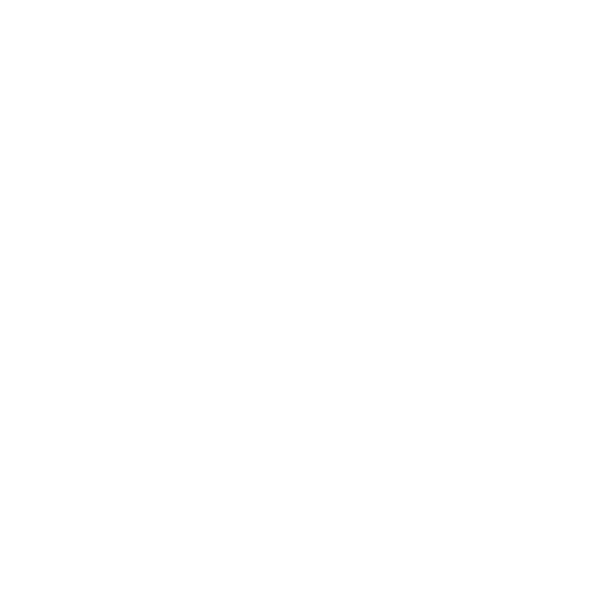

('sequence', ['', 'AB003409.1/96-167\n'])

Graphviz layout with neato failed
()
To debug what happened try:
P=pydot_from_networkx(G)
P.write_dot("file.dot")
And then run neato on file.dot


TypeError: 'NoneType' object has no attribute '__getitem__'

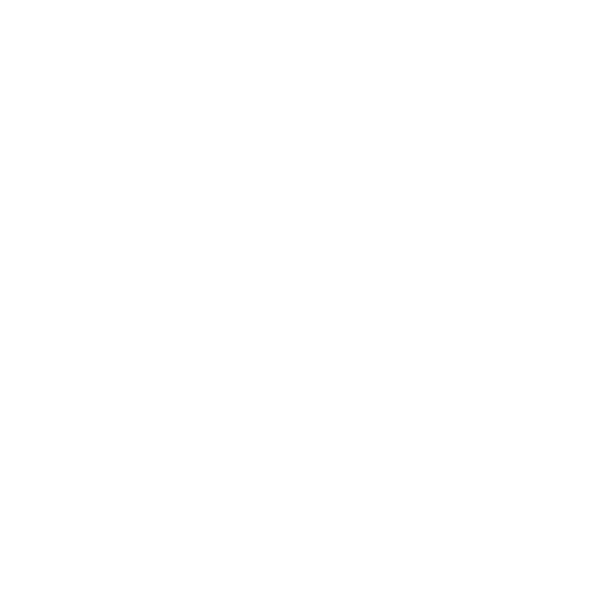

In [28]:
#generating the graph
for seq in seqs:
    G = fgraph._makeFastaGraph(seq)
    display.draw_graph(G, node_size=180, font_size=9, node_border=True, prog='neato')